In [1]:
%matplotlib inline
import os
import sys
import itertools

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt

import climatools.plot.plot 

from IPython import display

import imp
del xr.DataArray.climaviz
imp.reload(climatools.plot.plot)

<module 'climatools.plot.plot' from '/lfs1/home/jackyu/climatools/climatools/plot/plot.py'>

In [2]:
DIR_RUN = os.path.join('/lfs1/home/jackyu/radiation/crd',
                       'LW/examples/separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'n2o',
                       'wn_20_3000',
                       'absgas_variousPTs')

path_absgas = os.path.join(DIR_RUN, 'output_absgas.dat')

In [3]:
df = pd.read_csv(path_absgas, sep=r'\s+')

df = df.set_index(['v', 'pressure', 'temperature'])

ds = xr.Dataset.from_dataframe(df)

ds = ds.stack(pt=('pressure', 'temperature'))

ds.coords['ipt'] = ('pt', range(1, ds.dims['pt'] + 1))

/lfs1/home/jackyu/anaconda3/envs/work/lib/python3.4/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


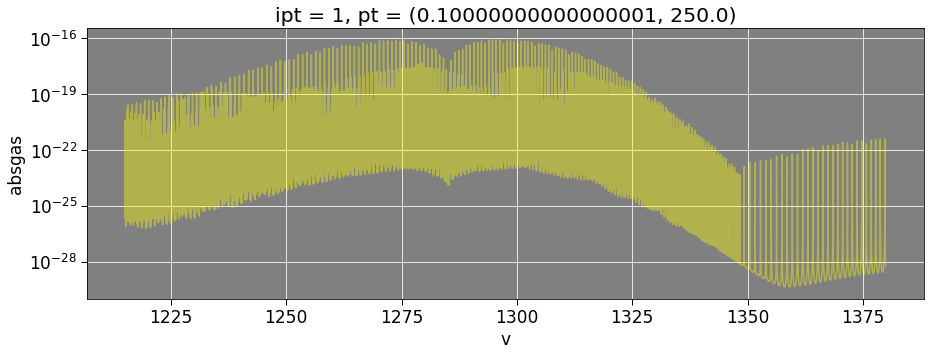

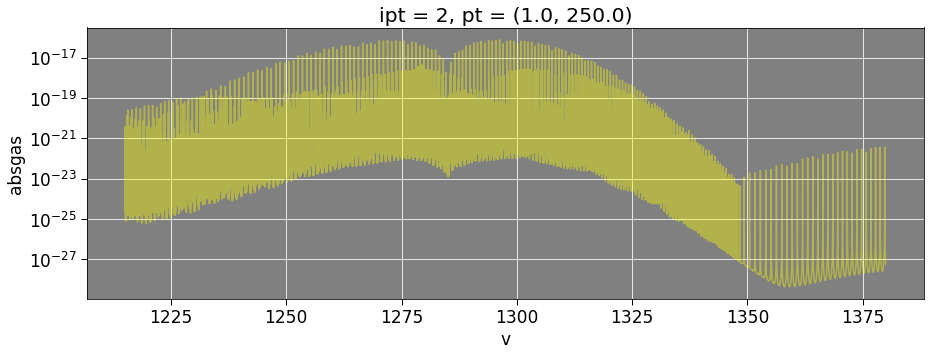

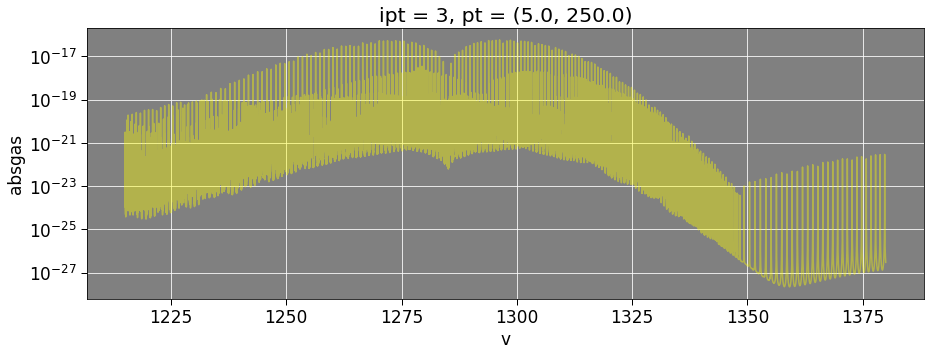

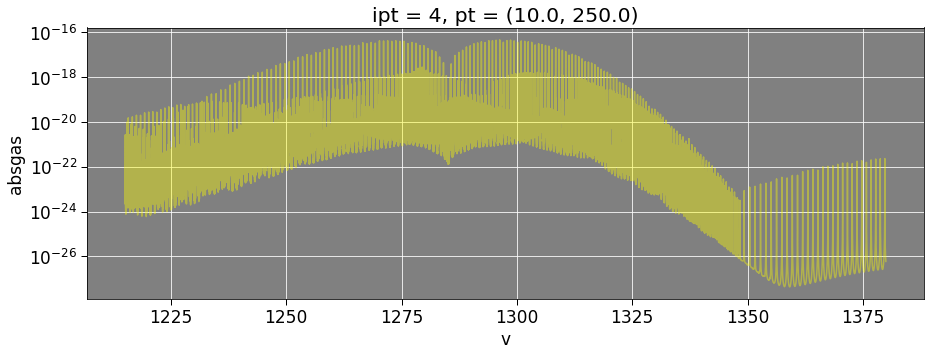

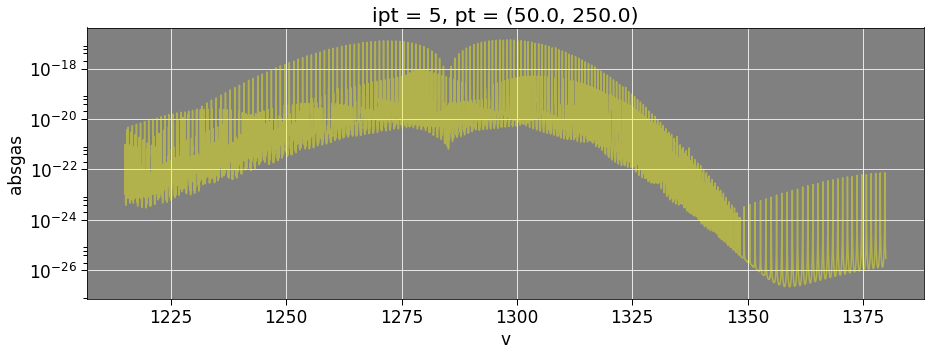

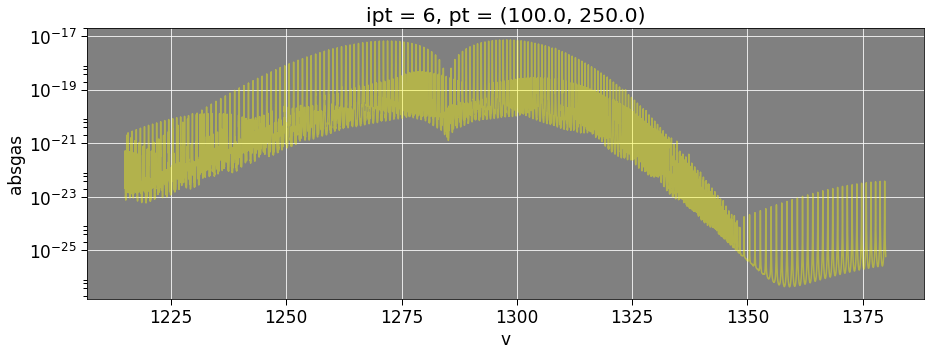

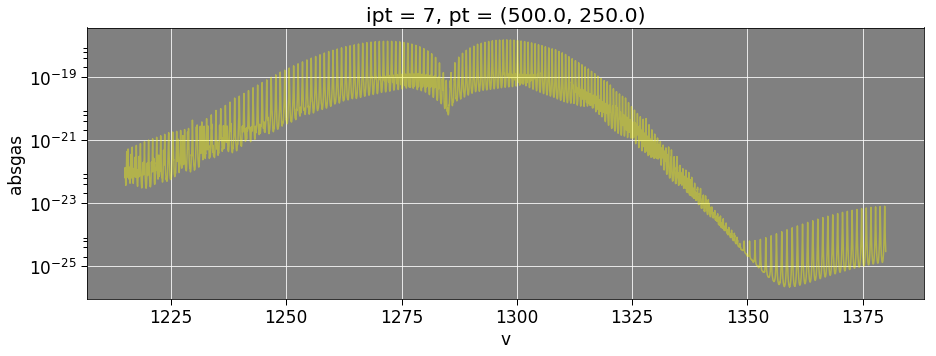

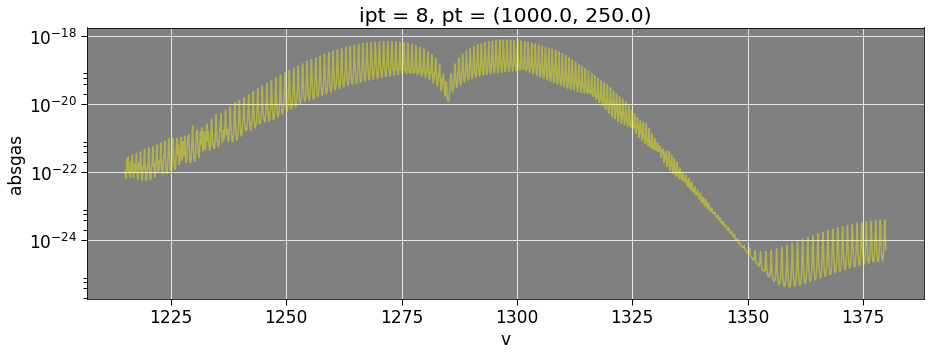

In [5]:
matplotlib.rcParams.update({'font.size': 17})

vmin, vmax = 1215, 1380

for pt in ds.coords['pt']:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
    ds['absgas'].sel(pt=pt).sel(v=slice(vmin, vmax))\
    .plot(ax=ax, color='yellow', alpha=.4)
    
    ax.set_axis_bgcolor('grey')
    ax.grid(color='white')
    
    ax.get_yaxis()\
    .set_tick_params(which='major', direction='out', size=6, width=1)
    ax.get_yaxis()\
    .set_tick_params(which='minor', direction='out', size=4, width=1)
    ax.set_yscale('log')
    
    ax.get_xaxis()\
    .set_tick_params(which='major', direction='out', size=6, width=1)
    ax.get_xaxis()\
    .set_tick_params(which='minor', direction='out', size=4, width=1)
    
    display.display(plt.gcf())
    plt.close()

In [6]:
# get the median value of absorption coefficient at (50 mb, 250 K)

print('Median absorption coefficient at (50 mb, 250 K):')
idx_median = ds['absgas'].sel(pt=(50, 250)).argsort()[int(ds.dims['v'] / 2)]
ds['absgas'].sel(pt=(50, 250)).isel(v=int(idx_median))


Median absorption coefficient at (50 mb, 250 K):


<xarray.DataArray 'absgas' ()>
array(1.3177228999999998e-25)
Coordinates:
    v        float64 2.913e+03
    ipt      int64 5
    pt       object (50.0, 250.0)

In [7]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')